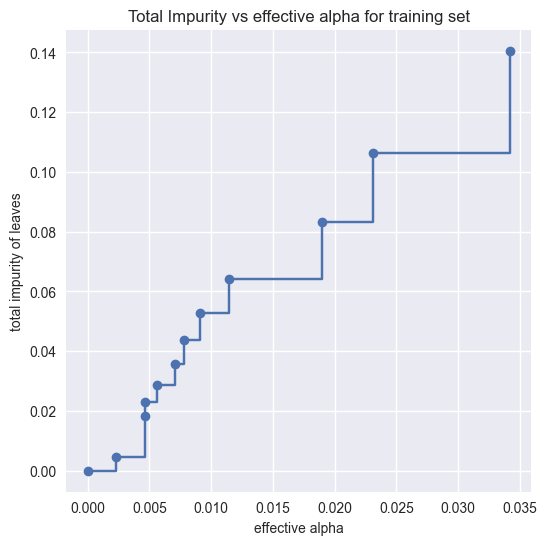

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


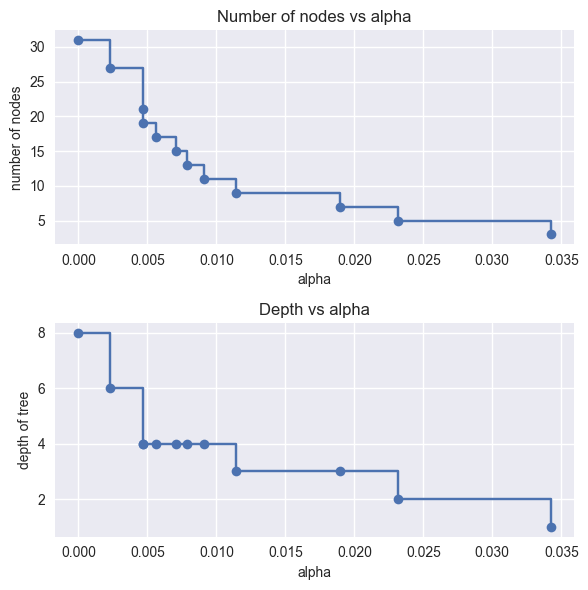

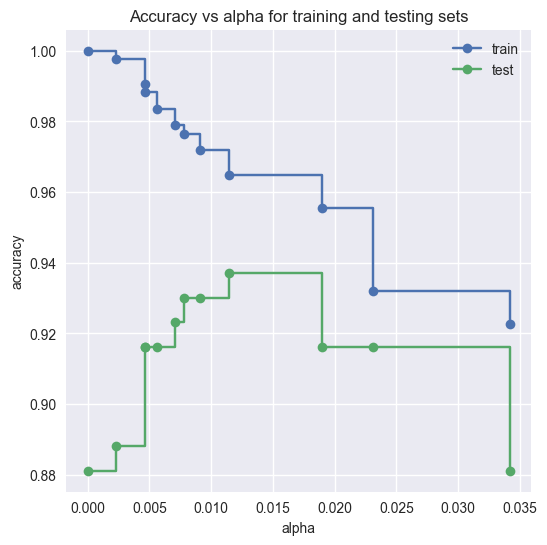

In [2]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap5\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
# 导入数据集划分工具
from sklearn.model_selection import train_test_split
# 导入数据集工具
from sklearn.datasets import load_breast_cancer
# 导入分类树
from sklearn.tree import DecisionTreeClassifier
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 获取数据
X, y = load_breast_cancer(return_X_y=True)
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0
)
# 构建决策树
clf = DecisionTreeClassifier(random_state=0)
# 代价复杂度路径
path = clf.cost_complexity_pruning_path(X_train, y_train)
# cp
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# 绘图
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()
fig.savefig("../codeimage/code4.pdf")
# 不同的alpha下构建决策树
clfs = []
for ccp_alpha in ccp_alphas:
    # 构建模型
    clf = DecisionTreeClassifier(
        random_state=0, ccp_alpha=ccp_alpha
    )
    # 模拟拟合
    clf.fit(X_train, y_train)
    # 加入到列表中
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
# 去掉最后一个
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
# 节点数量
node_counts = [clf.tree_.node_count for clf in clfs]
# 深度
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(6,6), tight_layout=True)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
plt.show()
fig.savefig("../codeimage/code5.pdf")
# 预测精度和alpha的关系
# 训练集的准确率
train_scores = [clf.score(X_train, y_train) for clf in clfs]
# 测试集的准确率
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()
fig.savefig("../codeimage/code6.pdf")
